In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor

from useful_functions import load_transform_split, scatter_resid, scatter_predvreal

#### Load data and cleeeeaaaann

In [2]:
X_train,X_test,y_train,y_test,pipeline = load_transform_split(target='DROPOUT_N',expand=False,clean=True,split=0.2,return_pipeline=True)
print(X_train.shape,X_test.shape)
y_train = y_train.to_numpy()[:,0]
y_test = y_test.to_numpy()[:,0]

(57656, 19) (14414, 19)


In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(20,activation='tanh',input_shape=[X_train.shape[1]]),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='relu'),
])
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [7]:
#LinearRegression:      mse ~= 350 on train set, 375 on test set.
#RandomForestRegressor: mse ~= 320 on train set, 385 on test set.
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)
print("Training MSE: %.2f, Testing MSE: %.2f"%(
      mean_squared_error(model.predict(X_train),y_train),
      mean_squared_error(model.predict(X_test),y_test)))
#^ This DNN ^:          mse ~= 320 on train set, 330 on test set.

Train on 46124 samples, validate on 11532 samples
Epoch 1/10
46124/46124 [==============================] - 8s 182us/sample - loss: 3.0971 - val_loss: 2.3714
Epoch 2/10
46124/46124 [==============================] - 7s 160us/sample - loss: 2.3628 - val_loss: 2.1381
Epoch 3/10
46124/46124 [==============================] - 8s 166us/sample - loss: 2.1531 - val_loss: 2.0673
Epoch 4/10
46124/46124 [==============================] - 7s 160us/sample - loss: 2.0534 - val_loss: 2.0140
Epoch 5/10
46124/46124 [==============================] - 7s 160us/sample - loss: 1.9935 - val_loss: 2.0041
Epoch 6/10
46124/46124 [==============================] - 9s 191us/sample - loss: 1.9509 - val_loss: 1.9020
Epoch 7/10
46124/46124 [==============================] - 8s 173us/sample - loss: 1.8985 - val_loss: 1.8952
Epoch 8/10
46124/46124 [==============================] - 8s 172us/sample - loss: 1.8584 - val_loss: 1.9893
Epoch 9/10
46124/46124 [==============================] - 8s 180us/sample - loss: 1.84

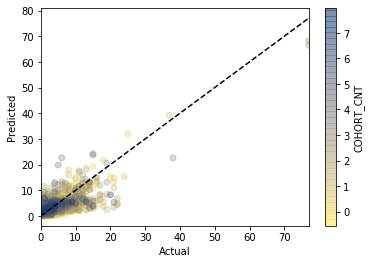

In [9]:
y_pred = model.predict(X_test)[:,0]
scatter_predvreal(y_test,y_pred,colorby=X_test[:,0]) #Color by scaled COHORT_CNT

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)
print("Training MSE: %.2f, Testing MSE: %.2f"%(
      mean_squared_error(model.predict(X_train),y_train),
      mean_squared_error(model.predict(X_test),y_test)))

Training MSE: 3.53, Testing MSE: 3.71


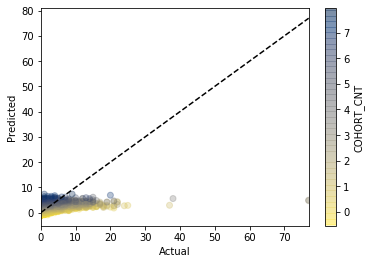

In [13]:
y_pred = model.predict(X_test)
scatter_predvreal(y_test,y_pred,colorby=X_test[:,0]) #Color by scaled COHORT_CNT

(14414,)